# **Cinematic Dynamics: Exploring Film Genres, Release Timing, and Success Factors**

> - 😀 Name: **Léa Blinière**, **Yanruiqi Yang**, **Pierre-Hadrien Levieil**,**Jason Mina**, **Salim Cherkaoui**
> - 🪪 SCIPER: **283670**, **346510**, **324420**, **355142**



# Table of Contents

TO CHANGE 


- **[PART 1: Data Exploration and Preparation](#1)**
    - [1.1 Load the Data and Visual Inspection](#11)
    - [1.2 Data Cleaning](#12)
    - [1.3 Data Merging](#13)
- **[PART 2: Addressing Our Research Questions](#2)**
    - [2.1 Research Question 1: Recurring Patterns and Impactful Factors](#21)
    - [2.2 Research Question 2: Analysis on Pursuing Oscar's](#22)
    - [2.3 Research Question 3: Analysis on Box Office Revenues and Ratings](#23)
    - [2.3 Research Question 4: Actors' Influence](#24)


### **Import Librairies**

In [1]:
################ Import Libraries - Data Processing ################
import pandas as pd
from sklearn.linear_model import LogisticRegression
################ Import Custom Modules ################
from preprocessing import *
from plot_function import *
from website import *

################ Import IPython Magic Commands ################

%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

### **Load Path**

### GOOGLE DRIVE 

In [2]:
MOVIE_PATH = get_path(
    "https://drive.google.com/file/d/1TI5F_Ch4Pdf8IWeFH8NIItsv8FaH1U9W/view?usp=sharing"
)

MOVIE_LENS_PATH = get_path(
    "https://drive.google.com/file/d/1832zcIH-fRTvL_eRSnrbDRSdP56dtUc1/view?usp=sharing"
)

DATA_PROCESS = get_path(
    "https://drive.google.com/file/d/1bEkF7HHPgjzhAIhgnvIZQAZmSQ01Nnkg/view?usp=sharing"
)

OSCAR_PATH = get_path(
    "https://drive.google.com/file/d/1oMZS7dcR9OR2uDA-9PP5-YrHch2Jt4V_/view?usp=sharing"
)


<a name="1"></a>
## **PART 1: Data Exploration and Preparation**
---

In this section, we will proceed with data preparation for our project. To accomplish this, we will utilize three datasets:

1. **Movie Metadata Dataset:** This dataset contains information about 81,741 films. It was extracted from the Freebase database dated November 4, 2012. It spans a period from the year 1915 to 2012, encompassing a wide range of historical films. Among the available information, we will specifically focus on elements such as the country of origin, box office revenue, and release date of each film.

2. **Character Metadata Dataset:** This dataset is aligned with the movie metadata dataset and includes character names for each movie as well as information regarding the actors playing them, such as age, gender, name, etc. 

3. **IMDb Dataset:** IMDb is a popular online database dedicated to movies, TV shows, and celebrities. IMDb provides various datasets for research purposes, including information about movies, TV series, and their associated data. We will use this dataset to extract user ratings for films.

4. **Award Dataset:** Derived from the "Academy Awards Dataset," this dataset contains information about films selected for the Oscars from the very first Oscars ceremony to the present day.

4. **MovieLens Dataset:** This MovieLens dataset is a widely used dataset in the field of recommender systems, containing millions of movie ratings and tag assignments collected from the MovieLens website. It offers detailed information about movies, users, and their interactions, making it an essential resource for research and development in personalized recommendation algorithms. We will use it due to its extensive collection of movie ratings, which provides valuable insights for analyzing viewer preferences and movie popularity trends (The notebook additional_dataset.ipynb contains both the code and the explanations detailing how we preprocessed this dataset to construct our own tailored additional dataset).

Once we have loaded these various datasets, we will proceed with a data preprocessing phase to make them suitable for our analysis.

### **1.1 Load the Data and Visual Inspection**

### Movie Metadata 

In [3]:
column_names = [
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie name",
    "Movie release date",
    "Movie box office revenue",
    "Movie runtime",
    "Movie languages",
    "Movie countries",
    "Movie genres"
]
df_movie = pd.read_csv(MOVIE_PATH, sep='\t', header=None, names=column_names)
df_movie.head(1)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."


### Award Dataset 

In [4]:
column_names = [
    "Movie Year",
    "Ceremony Year",
    "Ceremony", 
    "Category",
    "Name",
    "Movie name",
    "Winner"
]
df_award = pd.read_csv(OSCAR_PATH, header=None, names=column_names).drop(0)
df_award.head(1)

,Movie Year,Ceremony Year,Ceremony,Category,Name,Movie name,Winner
1,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False


### Movie Lens Dataset

##### MovieLens

[This MovieLens dataset](https://files.grouplens.org/datasets/movielens/ml-25m-README.html) is a widely used dataset in the field of recommender systems, containing millions of movie ratings and tag assignments collected from the MovieLens website. It offers detailed information about movies, users, and their interactions, making it an essential resource for research and development in personalized recommendation algorithms.

##### Sanity Check

In [52]:
df = pd.read_csv(RATINGS_LENS)
df.head()

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Check for illogical values
# We know that ratings should be on a 0-5 scale
invalid_ratings = df[(df['rating'] < 0) | (df['rating'] > 5)]

# Assuming userId and movieId should be positive integers
invalid_userId = df[df['userId'] < 1]
invalid_movieId = df[df['movieId'] < 1]

# Basic Descriptive Statistics
descriptive_stats = df.describe()

# Printing the results
print("Missing Values:\n", missing_values)
print("\nDuplicate Rows:", duplicate_rows)
print("\nInvalid Ratings:\n", invalid_ratings)
print("\nInvalid User IDs:\n", invalid_userId)
print("\nInvalid Movie IDs:\n", invalid_movieId)
print("\nDescriptive Statistics:\n", descriptive_stats)

Missing Values:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Duplicate Rows: 0

Invalid Ratings:
 Empty DataFrame
Columns: [userId, movieId, rating, timestamp]
Index: []

Invalid User IDs:
 Empty DataFrame
Columns: [userId, movieId, rating, timestamp]
Index: []

Invalid Movie IDs:
 Empty DataFrame
Columns: [userId, movieId, rating, timestamp]
Index: []

Descriptive Statistics:
              userId       movieId        rating     timestamp
count  2.500010e+07  2.500010e+07  2.500010e+07  2.500010e+07
mean   8.118928e+04  2.138798e+04  3.533854e+00  1.215601e+09
std    4.679172e+04  3.919886e+04  1.060744e+00  2.268758e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    4.051000e+04  1.196000e+03  3.000000e+00  1.011747e+09
50%    8.091400e+04  2.947000e+03  3.500000e+00  1.198868e+09
75%    1.215570e+05  8.623000e+03  4.000000e+00  1.447205e+09
max    1.625410e+05  2.091710e+05  5.000000e+00  1.574328e+09


Missing Values: There are no missing values in any of the columns, which is great as it means we have a complete dataset.

Duplicate Rows: There are no duplicate rows in your dataset.

Invalid Ratings, User IDs, and Movie IDs: There are no entries that fall outside the expected ranges for ratings, user IDs, or movie IDs.

##### Descriptive Statistics:

- The count shows that there are 25,000,100 entries in the dataset (a lot of data).

- The mean rating is approximately 3.53, indicating a moderately high average rating across all movies.

- The std (standard deviation) for ratings is about 1.06, suggesting a reasonable spread of ratings around the mean.

- min and max values for ratings are within the expected range (0.5 to 5.0).


Overall, the dataset appears to be clean and well-structured, with no apparent issues in terms of missing values, duplicates, or illogical entries. This makes it a solid foundation for our analysis.

##### Movies' average rating

In this section of the notebook, we focus on refining our movie review dataset to ensure higher data quality and enable more accurate analysis. 

Our first step involves filtering out users who have provided fewer than 10 reviews, as well as movies that have received less than 50 reviews. This is done to concentrate on data that is both reliable and substantial. 

Next, we normalize the user ratings. This step involves subtracting the average rating of each user from their individual ratings, which helps mitigate individual rating biases. 

Finally, we calculate the normalized average rating for each movie and adjust this by adding the overall average rating back. This adjustment provides a more balanced and representative view of each movie's reception. 

This process is crucial for gaining a more accurate and meaningful insight into movie popularity and viewer preferences, forming a solid foundation for our subsequent analysis.

In [ ]:
# Filter users with at least 5 reviews
user_review_counts = df['userId'].value_counts()
users_with_5_reviews = user_review_counts[user_review_counts >= 10].index
df_filtered_users = df[df['userId'].isin(users_with_5_reviews)]

# Filter movies with at least 10 reviews
movie_review_counts = df_filtered_users['movieId'].value_counts()
movies_with_10_reviews = movie_review_counts[movie_review_counts >= 50].index
df_filtered = df_filtered_users[df_filtered_users['movieId'].isin(movies_with_10_reviews)]

# Calculate average rating per user
user_avg = df_filtered.groupby('userId')['rating'].mean()

# Normalize ratings
df_filtered['norm_rating'] = df_filtered.apply(lambda x: x['rating'] - user_avg[x['userId']], axis=1)

# Calculate the normalized average rating for each movie
movie_norm_avg = df_filtered.groupby('movieId')['norm_rating'].mean()

# Optional: Add back the overall average rating
overall_avg = df_filtered['rating'].mean()
adjusted_movie_rating = movie_norm_avg + overall_avg

##### Replacing movie ids by the movie name

In [ ]:
# Convert the Series to a DataFrame
ratings_df = adjusted_movie_rating.reset_index()

# Rename the columns to 'movieId' and 'rating'
ratings_df.columns = ['movieId', 'rating']

# Print the resulting DataFrame
display(ratings_df)

,movieId,rating
0,1,3.799459
1,2,3.260367
2,3,3.179223
3,4,2.937154
4,5,3.098408
...,...,...
13171,205383,3.643094
13172,205425,3.758098
13173,206499,3.149143
13174,206805,3.280014


In [ ]:
file_path = './Data/ml-25m/movies.csv'

# Read the CSV file into a DataFrame
names_df = pd.read_csv(file_path)

In [ ]:
names_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [ ]:
# Merge the DataFrames on 'movieId'
merged_df = pd.merge(names_df, ratings_df, on='movieId')

# Select only the relevant columns
final_df = merged_df[['movieId', 'title', 'rating']] 

# Print the resulting DataFrame
display(final_df)

,movieId,title,rating
0,1,Toy Story (1995),3.799459
1,2,Jumanji (1995),3.260367
2,3,Grumpier Old Men (1995),3.179223
3,4,Waiting to Exhale (1995),2.937154
4,5,Father of the Bride Part II (1995),3.098408
...,...,...,...
13171,205383,El Camino: A Breaking Bad Movie (2019),3.643094
13172,205425,Dave Chappelle: Sticks & Stones (2019),3.758098
13173,206499,Between Two Ferns: The Movie (2019),3.149143
13174,206805,In the Shadow of the Moon (2019),3.280014


In [ ]:
# Remove the year from the 'title' column
final_df['title'] = final_df['title'].str.replace(r" \(\d{4}\)", "", regex=True)

final_df

,movieId,title,rating
0,1,Toy Story,3.799459
1,2,Jumanji,3.260367
2,3,Grumpier Old Men,3.179223
3,4,Waiting to Exhale,2.937154
4,5,Father of the Bride Part II,3.098408
...,...,...,...
13171,205383,El Camino: A Breaking Bad Movie,3.643094
13172,205425,Dave Chappelle: Sticks & Stones,3.758098
13173,206499,Between Two Ferns: The Movie,3.149143
13174,206805,In the Shadow of the Moon,3.280014


In [ ]:
final_df["title"][0]

'Toy Story'

### Movies exact dates of release

Our analysis heavily relies on the exact release dates of movies. However, 50% of our dataset only includes the year of release, not the month. Therefore, we will endeavor to extract as many exact release dates as possible from [this Kaggle dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/data). 

Additionally, this dataset contains IMDb votes and ratings, which could also prove useful for our analysis.

In [ ]:
movies = pd.read_csv("./Data/movies_metadata.csv",
                    usecols=["id","title","vote_average","vote_count","release_date"])

In [ ]:
movies

,id,release_date,title,vote_average,vote_count
0,862,1995-10-30,Toy Story,7.7,5415.0
1,8844,1995-12-15,Jumanji,6.9,2413.0
2,15602,1995-12-22,Grumpier Old Men,6.5,92.0
3,31357,1995-12-22,Waiting to Exhale,6.1,34.0
4,11862,1995-02-10,Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...
45461,439050,NaN,Subdue,4.0,1.0
45462,111109,2011-11-17,Century of Birthing,9.0,3.0
45463,67758,2003-08-01,Betrayal,3.8,6.0
45464,227506,1917-10-21,Satan Triumphant,0.0,0.0


In [ ]:
# Display the first few rows of the release_date column
print(movies['release_date'].head())

# Check the data type of the release_date column
print(movies['release_date'].dtype)

# Count the number of missing or NaN values in the release_date column
print(movies['release_date'].isna().sum())

# Check the length of the date strings
print(movies['release_date'].str.len().unique())

0    1995-10-30
1    1995-12-15
2    1995-12-22
3    1995-12-22
4    1995-02-10
Name: release_date, dtype: object
object
87
[10. nan  1.  2.]


In [ ]:
# Filtering out rows where the release_date is NaN or its length is less than 7
filtered_movies = movies[movies['release_date'].notna()]
filtered_movies = filtered_movies[filtered_movies['release_date'].str.len() >= 7]

In [ ]:
# Check for duplicate rows based on 'id' and 'title'
duplicate_ids = filtered_movies['id'].duplicated().sum()
duplicate_titles = filtered_movies['title'].duplicated().sum()

# Check data types
data_types = filtered_movies.dtypes

# Inspect release dates
# Assuming release_date is in string format, you might convert it to datetime if needed
invalid_release_dates = filtered_movies[~filtered_movies['release_date'].str.match(r'\d{4}-\d{2}-\d{2}')].shape[0]

# Validate vote average and count
invalid_vote_average = filtered_movies[(filtered_movies['vote_average'] < 0) | (filtered_movies['vote_average'] > 10)].shape[0]
invalid_vote_count = filtered_movies[filtered_movies['vote_count'] < 0].shape[0]

# Print results
print(f"Duplicate IDs: {duplicate_ids}")
print(f"Duplicate Titles: {duplicate_titles}")
print(f"\nData Types:\n{data_types}")
print(f"\nInvalid Release Dates: {invalid_release_dates}")
print(f"Invalid Vote Averages: {invalid_vote_average}")
print(f"Invalid Vote Counts: {invalid_vote_count}")


Duplicate IDs: 30
Duplicate Titles: 3180

Data Types:
id               object
release_date     object
title            object
vote_average    float64
vote_count      float64
dtype: object

Invalid Release Dates: 0
Invalid Vote Averages: 0
Invalid Vote Counts: 0


In [ ]:
# Remove duplicate rows based on 'id'
filtered_movies = filtered_movies.drop_duplicates(subset='id')

# Re-check for duplicates and data types after filtering
duplicate_ids_after = filtered_movies['id'].duplicated().sum()
duplicate_titles_after = filtered_movies['title'].duplicated().sum()
data_types_after = filtered_movies.dtypes

# Print results after filtering
print(f"Duplicate IDs after filtering: {duplicate_ids_after}")
print(f"Duplicate Titles after filtering: {duplicate_titles_after}")
print(f"\nData Types after filtering:\n{data_types_after}")


Duplicate IDs after filtering: 0
Duplicate Titles after filtering: 3150

Data Types after filtering:
id               object
release_date     object
title            object
vote_average    float64
vote_count      float64
dtype: object


The presence of duplicate titles with different IDs in our filtered_movies DataFrame indicates that there might be different versions or releases of the same movie, or it could be a data entry error. To further refine the data, we can check if these duplicates have the same release date. If they do, it's more likely that they are indeed duplicates and should be removed. However, if the release dates differ, they might be different versions or movies with the same title released in different years.

In [ ]:
# Group by title and check if there are multiple unique release dates for the same title
duplicates_with_different_dates = filtered_movies.groupby('title').filter(lambda x: len(x['release_date'].unique()) > 1)

# Display these duplicates
print("Duplicates with Different Release Dates:")
display(duplicates_with_different_dates)

# We keep the entry with the highest vote_count for each title:
cleaned_movies = duplicates_with_different_dates.sort_values(by=['title', 'vote_count'], ascending=[True, False])
#cleaned_movies = cleaned_movies.drop_duplicates(subset='title', keep='first')

# Final check for duplicates
final_duplicate_titles = cleaned_movies['title'].duplicated().sum()
print(f"\nFinal Duplicate Titles: {final_duplicate_titles}")

Duplicates with Different Release Dates:


,id,release_date,title,vote_average,vote_count
5,949,1995-12-15,Heat,7.7,1886.0
6,11860,1995-12-15,Sabrina,6.2,141.0
16,4584,1995-12-13,Sense and Sensibility,7.2,364.0
25,16420,1995-12-15,Othello,7.0,33.0
27,17015,1995-09-27,Persuasion,7.4,36.0
...,...,...,...,...,...
45421,52103,1997-01-01,Pickpocket,7.2,13.0
45453,404604,2017-07-07,Mom,6.6,14.0
45454,420346,2015-01-11,The Morning After,4.0,2.0
45460,30840,1991-05-13,Robin Hood,5.7,26.0



Final Duplicate Titles: 3150


In [ ]:
# Group by 'title' and 'release_date', then sort by 'vote_count' within each group
filtered_movies_sorted = filtered_movies.sort_values(by=['title', 'release_date', 'vote_count'], ascending=[True, True, False])

# Drop duplicates, keeping the first entry in each group (the one with the highest vote count)
cleaned_movies = filtered_movies_sorted.drop_duplicates(subset=['title', 'release_date'], keep='first')

# Final check for duplicates
final_duplicate_titles = cleaned_movies['title'].duplicated().sum()
print(f"Final Duplicate Titles: {final_duplicate_titles}")

Final Duplicate Titles: 3150


In [ ]:
cleaned_movies

,id,release_date,title,vote_average,vote_count
18757,55245,2010-01-01,!Women Art Revolution,4.3,2.0
30961,41371,2010-07-27,#1 Cheerleader Camp,3.4,23.0
36153,301325,2015-11-20,#Horror,3.4,53.0
23501,267752,2013-11-21,#chicagoGirl,7.0,1.0
28042,143747,1966-12-18,"$1,000 on the Black",6.0,2.0
...,...,...,...,...,...
22346,388182,2013-08-07,هیچ کجا هیچ کس,10.0,1.0
38463,120249,1974-11-05,‘Rameau’s Nephew’ by Diderot (Thanx to Dennis ...,10.0,1.0
8882,14670,1986-09-23,’Round Midnight,6.7,20.0
39033,109380,1965-02-12,…And the Fifth Horseman Is Fear,8.0,4.0


#### Merge all : movie title + movie date of release + ratings
In this section of the notebook, we perform a critical step of merging the movie titles, their respective dates of release, and the ratings. This consolidation allows us to form a comprehensive dataset that we will be using moving forward.

In [ ]:
# Find common titles
common_titles = cleaned_movies[cleaned_movies['title'].isin(final_df['title'])]

# Count the number of common titles
num_common_titles = common_titles['title'].nunique()

# Print the number of common titles
print(f"Number of Common Titles: {num_common_titles}")

Number of Common Titles: 8123


In [ ]:
# Merge the DataFrames on the 'title' column
# 'how' parameter is set to 'left' to keep all records from metadata_df and only add ratings where available
combined_df = pd.merge(cleaned_movies, final_df[['title', 'rating']], on='title', how='left')

In [ ]:
combined_df[combined_df['title'] == 'Toy Story']

,id,release_date,title,vote_average,vote_count,rating
42721,862,1995-10-30,Toy Story,7.7,5415.0,3.799459


In [ ]:
# Save the dataframe as .csv
combined_df.to_csv('combined_movies_data.csv', index=False)

#### Loading the final Movie Lens after preprocessing 


In [14]:
column_names = [
    "ID",
    "Movie release date",
    "Movie name",
    "Average Vote ",
    "Vote Count",
    "Rating"
]
df_lens = pd.read_csv(MOVIE_LENS_PATH, header=None, names=column_names).drop(0)
df_lens.head(1)

,ID,Movie release date,Movie name,Average Vote,Vote Count,Rating
1,55245,2010-01-01,!Women Art Revolution,4.3,2.0,NaN


### **1.2 Data Cleaning**

### Movie Metadata 

In this initial step, we will undertake the following tasks:

1. **Format Conversion** 
   The columns "Movie languages," "Movie countries," and "Movie genres" currently store Freebase IDs, which makes it challenging to understand and interpret the data. Our first task is to convert these dictionaries containing Freebase IDs into simple strings that contain the actual language, country, or genre names.

2. **Reprocessing film languages**
   In this step, the languages associated with the films are reprocessed. Some films may have been considered "silent films," meaning they were silent and had a specified language. To simplify the analysis, these films are now identified as "silent film" in the language category. Additionally, mentions of the language "english language" are modified to simply "english" for easier processing and subsequent data analysis.

3. **Creating multiple rows for films with multiple genres, languages, or countries**
   This step aims to make data analysis more manageable by handling films with multiple genres, languages, or countries separately. Instead of having a single entry for a film with multiple characteristics, multiple distinct rows are created, each corresponding to a unique characteristic. For example, if a film has two different genres, two separate rows will be created for that film, each indicating a different genre. This allows for a more detailed and precise analysis of the data. It is also mentioned that in the future, the team may focus only on films with a single genre, a single language, and a single country to avoid potential bias caused by the multiplicity of these characteristics.

4. **Splitting the date into 3 columns: year, month, day, and adding a "month available" column**
   In this step, the dates associated with the films are broken down into three distinct parts: the year (year), the month (month), and the day (day). Additionally, a new column called "month available" is created. This column can potentially be useful if the research team seeks to complete missing data regarding the release month of the films.


In [15]:
#df_process = process_movie_data(df_movie, save_to_path=save_path)

In [16]:
df_movie = pd.read_csv(DATA_PROCESS)

In [17]:
df_movie.head(1)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Thriller,2001,8,24,True


Since our analysis relies on the relationship that can exist between the release period of a film and other parameters, it is important to have an overview of the number of exploitable data points in our dataset.

In this dataset, there are 36429 movies with missing release month out of a total of 75478 movies.


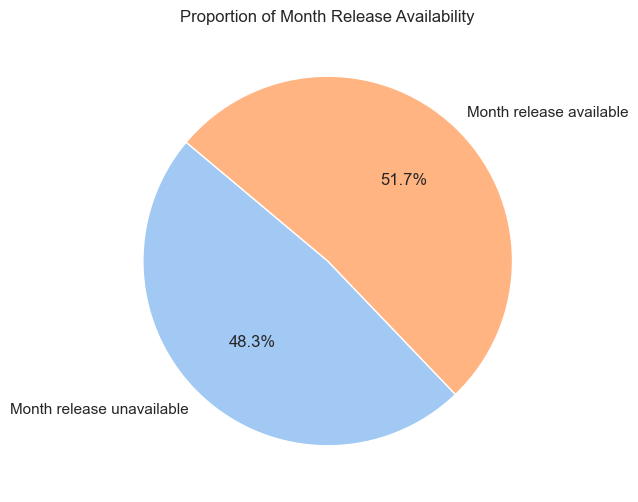

In [18]:
plot_month_release_availability(df_movie.drop_duplicates(subset=['Movie name'], inplace=False))

### Movie Lens Dataset

In [19]:
# Drop unnecessary columns.
df_lens.drop(['ID', 'Rating'], axis=1, inplace=True)
df_lens.head(1)

,Movie release date,Movie name,Average Vote,Vote Count
1,2010-01-01,!Women Art Revolution,4.3,2.0


### **1.3 Data Merging**

As previously seen, only 51.7% of our dataset is usable for our analysis. Using the Movie Lens dataset, which also provides the release date of each film, we will merge these two datasets in an attempt to increase the proportion of data for which the months are available.

Given that it's possible for certain films to share the same name but not be released in the same year, we will ensure to verify that the release year matches before extracting the corresponding month.

In [20]:
# Merge the two DataFrames based on the 'Movie name' column, using an inner join.
df_movie = pd.merge(df_movie, df_lens, left_on='Movie name', right_on='Movie name', how='left')

In [21]:
# Complete missing values in the 'Release Month' and 'Release Day' column.
df_movie = update_release_month_and_day(df_movie)

In [22]:
df_movie.head(1)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available,Movie release date,Average Vote,Vote Count
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Thriller,2001,8,24,True,2001-08-24,4.8,299.0


In this dataset, there are 30520 movies with missing release month out of a total of 75478 movies.


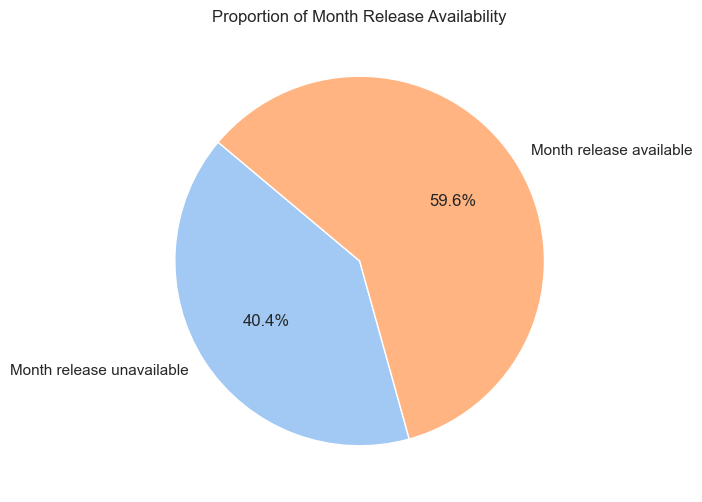

In [23]:
plot_month_release_availability(df_movie.drop_duplicates(subset=['Movie name'], inplace=False))

This step has led to an increase of approximately 10% in the proportion of data usable for our analysis. For the final analysis, we could consider further expanding our dataset, possibly by utilizing the 'Wikipedia movie ID' provided in the metadata dataset.

In [24]:
# Select only the exploitable data.
df_movie = df_movie[df_movie['Month Available']]

df_movie_with_id = df_movie.copy()
# Drop unnecessary columns.
df_movie_with_id.drop(['Wikipedia movie ID', 'Movie release date'], axis=1, inplace=True) # used to be merged with character metadata
df_movie.drop(['Freebase movie ID', 'Wikipedia movie ID', 'Movie release date'], axis=1, inplace=True) 

In [25]:
df_movie = df_movie[(df_movie['Release Year'] > 1910) & (df_movie['Release Year'] < 2013)]

### Award Dataset 

During the preprocessing of the Award dataset, we had to exclude data that was not related to films (some awards are "honorary awards" given to individuals). Subsequently, we removed unnecessary columns such as the ceremony type or the awarded person.

In [26]:
# Remove rows with missing 'Movie name' values, as these do not pertain to films.
df_award = df_award.dropna(subset=['Movie name'], axis=0)

# Drop unnecessary columns 'Ceremony Year', 'Ceremony', and 'Name'.
df_award = df_award.drop(['Ceremony Year', 'Ceremony', 'Name'], axis=1)

# Convert the 'Movie Year' column to integer data type for consistency.
df_award['Movie Year'] = df_award['Movie Year'].astype(int)

df_award.head(1)

,Movie Year,Category,Movie name,Winner
1,1927,ACTOR,The Noose,False


Then, we need to merge the Award dataset with the Movie dataset to focus on awarded movies in the main dataset.

In [27]:
# Merge datasets
df_merge_award = pd.merge(df_movie, df_award, left_on='Movie name', right_on='Movie name', how='inner')

# Handling release year
release_year_list = df_merge_award['Release Year'].to_list()
release_year_list =  [int(x) if not pd.isna(x) else 0 for x in release_year_list]
df_merge_award['Release Year'] = release_year_list

# Filtering movies with correct release year
df_merge_award = df_merge_award[df_merge_award['Release Year'] == df_merge_award['Movie Year']]
df_merge_award.head()
df_merge_award.shape


(111160, 15)

We can have a brief look at the dataset and clean it by filtering out valid movies records checking no duplicate with a same movie name. It is important to check how many data records are accessible for further exploration.

In [28]:
# Count the total films 
print("We have {} data for the films that have been selected for the Oscars".format(df_merge_award['Movie name'].nunique()))

# Count the films with available release month and unique value for column 'Movie name'
df_month_avail = df_merge_award[df_merge_award['Month Available'] == True].drop(['Month Available'], axis=1)
num_films_month_avail = df_month_avail['Movie name'].nunique()
print("Number of films with available release month and unique value for column 'Movie name':", num_films_month_avail)
df_month_avail.head()

We have 2657 data for the films that have been selected for the Oscars
Number of films with available release month and unique value for column 'Movie name': 2657


,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Release Month,Release Day,Average Vote,Vote Count,Movie Year,Category,Winner
0,Alexander's Ragtime Band,3600000.0,106.0,English,United States of America,Musical,1938,8,16,4.8,6.0,1938,ART DIRECTION,False
1,Alexander's Ragtime Band,3600000.0,106.0,English,United States of America,Musical,1938,8,16,4.8,6.0,1938,FILM EDITING,False
2,Alexander's Ragtime Band,3600000.0,106.0,English,United States of America,Musical,1938,8,16,4.8,6.0,1938,MUSIC (Scoring),True
3,Alexander's Ragtime Band,3600000.0,106.0,English,United States of America,Musical,1938,8,16,4.8,6.0,1938,MUSIC (Song),False
4,Alexander's Ragtime Band,3600000.0,106.0,English,United States of America,Musical,1938,8,16,4.8,6.0,1938,OUTSTANDING PRODUCTION,False


## **PART 2: Addressing Our Scientific Question**
---

The research questions we would like to address can be divided into four distinct parts.

**Question 1**: Are there any recurring patterns between a film's genre and its release timing within a year? If such patterns exist, do they vary based on the location of the movie, and can these insights contribute to predicting the genre of upcoming film releases in subsequent seasons?

**Question 2**: How does the release timing of a movie impact its likelihood of winning an Oscar award? Which other factors have an impact on these chances?

**Question 3**: How does the release month of a movie influence its overall success and popularity, as evidenced by box office revenues, the number of votes, and ratings, while also accounting for the evolution of data documentation quality over the years?


## **Research Question 1**
---
**Analysis of Recurring Patterns in Release Schedules**: Influence of Film Genre and Continent of Distribution


### **1. Exploration and Data Preprocessing** 

#### *1.1 Removing uncessary information for this research question*

For this analysis, we will focus on the film genres, the release period of the year, and the locations where they are released. Therefore, we will begin by selecting the columns of interest for our analysis.

In [30]:
df_release_info = df_movie.drop(['Movie box office revenue', 'Movie runtime', 'Movie languages', 'Vote Count', 'Average Vote '], axis=1, inplace=False)
df_release_info.drop_duplicates(inplace=True)
df_release_info.head(1)

,Movie name,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available
0,Ghosts of Mars,United States of America,Thriller,2001,8,24,True


We observe, unsurprisingly, that the number of films increases considerably with the years. However, the proportion of older films is not negligible. In the context of our study, where we will investigate patterns that may exist between the time of year and the number of film releases, we must take this factor into account and study its evolution over time.

#### *1.2 Bar chart of release months*

The study will investigate the possible existence of a correlation between annual periodicity and film genres. However, it is also relevant to examine the existence of trends that are not dependent on the film genre or location. To provide us with an initial idea, we will calculate the monthly average of films released, considering all genres and locations. This will give us an overview of the distribution of film releases throughout the seasons. Of course, further analysis will be necessary before drawing any definitive conclusions.

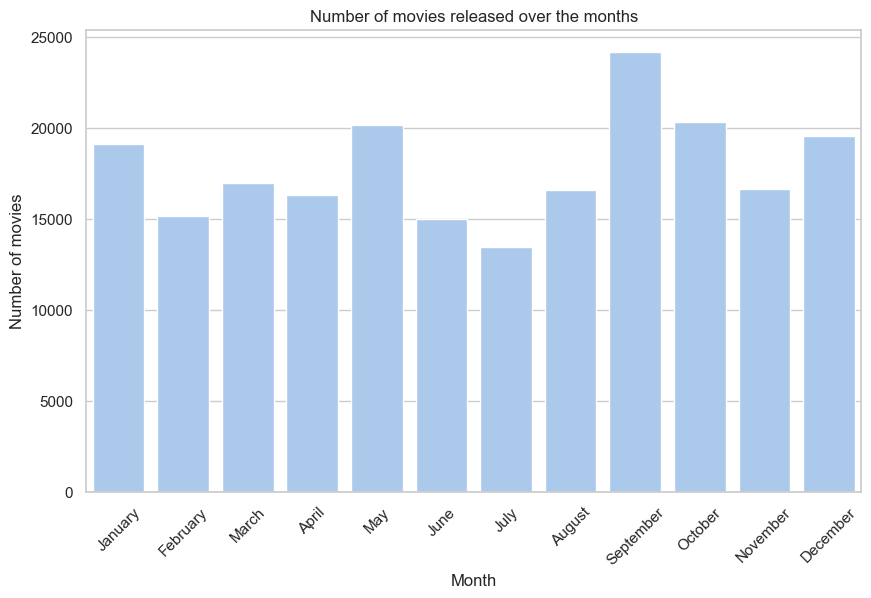

In [31]:
plot_monthly_movie_counts(df_release_info)

This bar chart allows us to conclude that the distribution of films throughout the year is not uniform; for instance, the summer months appear to have fewer releases than others. Therefore, it is necessary to differentiate, for each genre, whether the trend is driven by the overall distribution of films throughout the year or if it is specific to certain film genres.

#### *1.3 Repartition of the main genre*

In [32]:
print("In our dataset, we have {} film genres represented".format(df_release_info['Movie genres'].nunique()))

In our dataset, we have 356 film genres represented


In our dataset, we have a wide variety of genres represented.  For now, we will focus on the five most represented genres in the dataset.

In [33]:
sorted_genre_counts = count_and_sort_movie_genres(df_release_info)

In [34]:
# Select the top 5 genres
selected_genres = list(sorted_genre_counts.keys())[:5]
print("Number of genres selected: ", len(selected_genres))
print("Selected genres: ", selected_genres)

Number of genres selected:  5
Selected genres:  ['Drama', 'Comedy', 'Romance Film', 'Thriller', 'Action']


In [35]:
# Filter the dataset to only include the selected genres
df_release_info = filter_movies_by_genres(df_release_info, selected_genres)

Let's observe the representation of film genres in our resulting dataset.

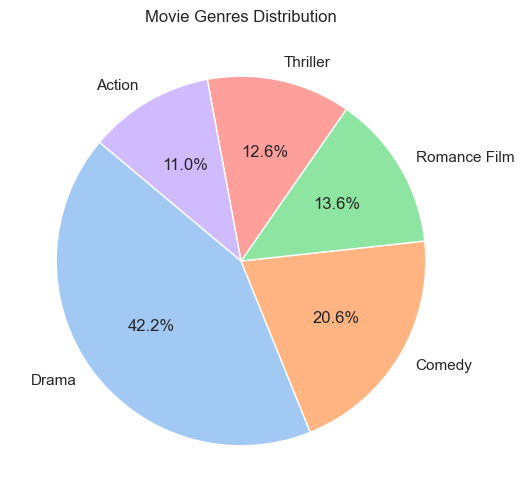

In [36]:
create_genre_pie_chart(df_release_info)

The 'drama' genre predominates significantly, while the other genres are fairly balanced among themselves.Now, we will examine the distribution of films across months based on their genres.

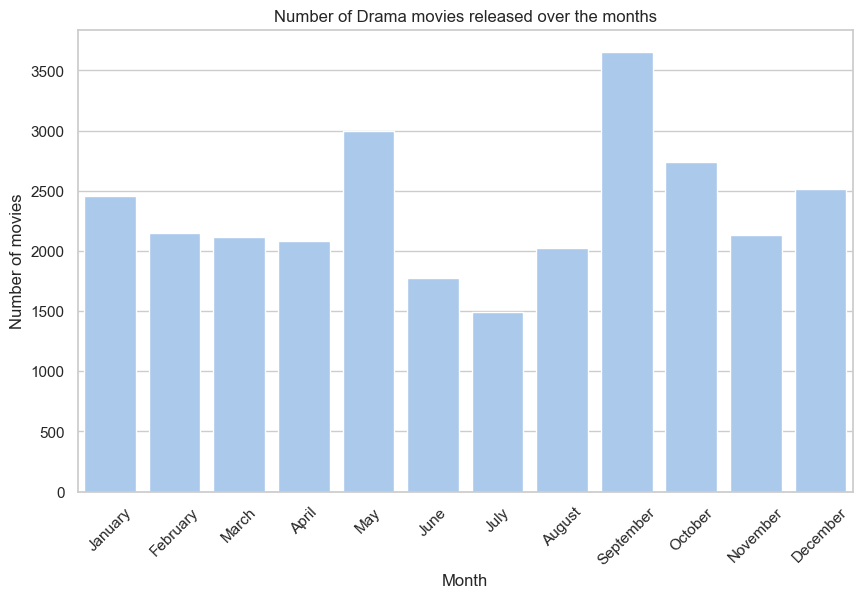

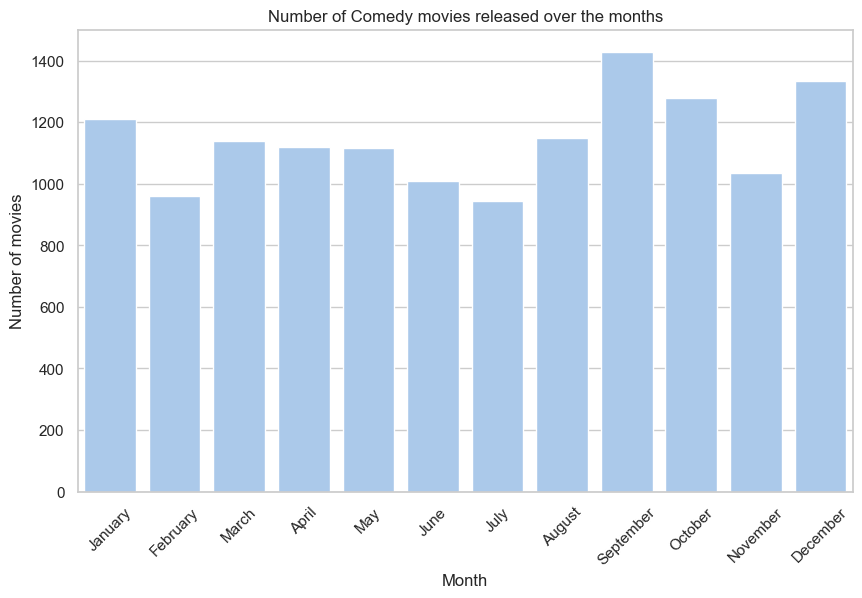

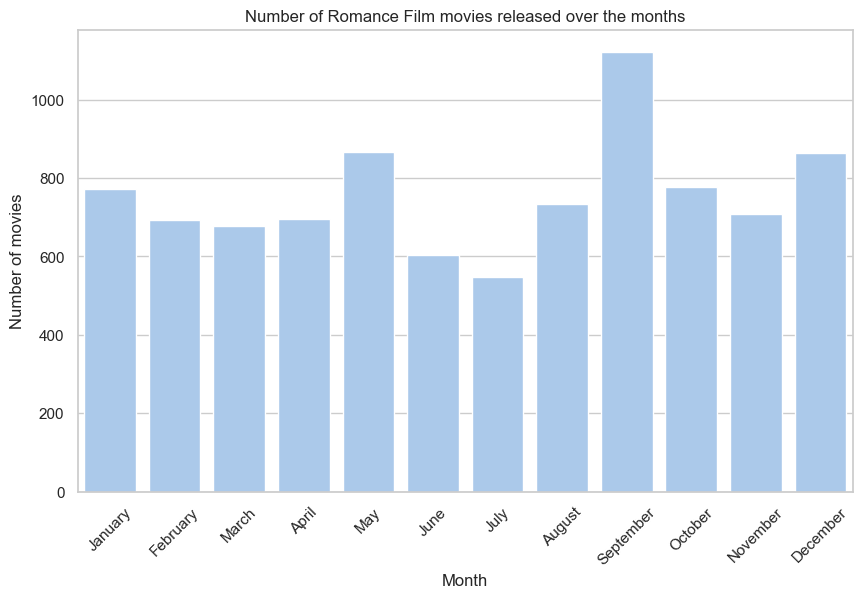

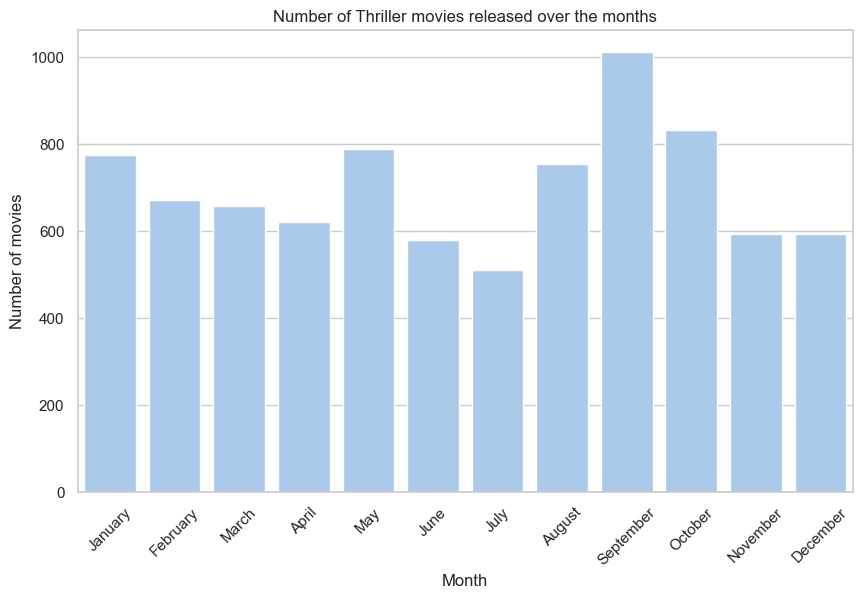

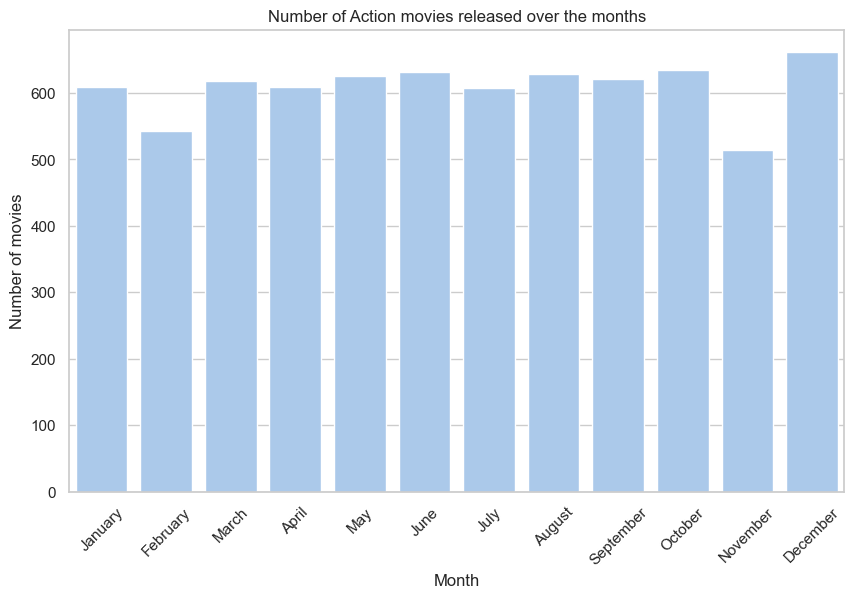

In [37]:
plot_monthly_movie_counts(df_release_info, selected_genres)

We observe significantly different distributions among genres. Action films appear to have a relatively uniform distribution throughout the year. It's worth noting that action is the only genre that doesn't experience a decline during the summer, which contradicts the general trend. It's important to mention that for the final analysis, correlation tests will be considered to confirm whether or not months can have an impact on certain genres

#### *1.4 Repartition of the continent*

In [38]:
print("In our dataset, we have {} countries in which movies have been released".format(df_release_info['Movie countries'].nunique()))

In our dataset, we have 139 countries in which movies have been released


In our dataset, we have a wide range of countries represented. To study the link between location and the distribution of release months, we will group these countries by their continents.

In [39]:
df_release_info = assign_movie_continents(df_release_info)
df_release_info.head(1)

0it [00:00, ?it/s]

66583it [00:02, 26931.92it/s]


,Movie name,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available,Movie Continent
0,Ghosts of Mars,United States of America,Thriller,2001,8,24,True,North America


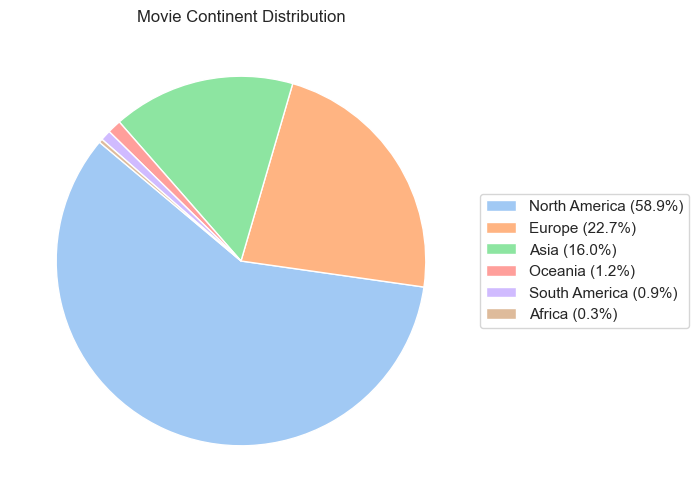

In [40]:
plot_movie_continent_distribution(df_release_info.drop_duplicates(subset=['Movie name'], inplace=False))

The pie chart shows us the proportion of each continent in our dataset. We observe that three continents represent almost the entirety of our dataset, so we will focus on these.

In [41]:
continents_to_keep  = ['Europe', 'Asia', 'North America']
df_release_info = df_release_info[df_release_info['Movie Continent'].isin(continents_to_keep)]

#### *1.5 Setting a Threshold for Data Inclusion*


Before continuing our analysis, it is important to take into account the distribution of the number of data by year.

In [42]:
df_release_info['Date'] = pd.to_datetime(df_release_info['Release Year'].astype(str) + '-' +
                                     df_release_info['Release Month'].astype(str).str.zfill(2))

# Mettre 'Date' comme index du DataFrame
df_release_info.set_index('Date', inplace=True)

In [43]:
df_release_info = filter_dataframe_by_threshold(df_release_info, threshold=200)

This histogram displays the distribution of the number of films released each year, regardless of their genre or release location. We observe a significant increase over the years. To maintain the relevance of our analysis, we have established a threshold of 200 films per year as a selection criterion for the years to be included in our study. After applying this criterion, we selected the most recent year that did not meet it and then excluded all data prior to that date. This approach ensures that our dataset remains statistically relevant and consistent over time. Furthermore, upon examining this graph, we notice that after 2009, the number of films decreases significantly in the dataset. This trend appears counterintuitive and may be attributed to the difficulty of obtaining recent data (the dataset was published in 2012). To avoid potential data bias, we will, therefore, focus on data up to the year 2009.

In [44]:
df_release_info = df_release_info[df_release_info['Release Year'] < 2010]

In [45]:
min_year = sorted(df_release_info['Release Year'].unique())[0]
max_year = sorted(df_release_info['Release Year'].unique())[-1]

print("The first year in our dataset is: ", min_year)
print("The last year in our dataset is: ", max_year)

The first year in our dataset is:  1929
The last year in our dataset is:  2009


### **2. Comprehensive Seasonality Analysis Across All Genres and Locations** 

#### *2.1 Monthly Cinematic Release Dynamics: Histogram Analysis of Release Rates*

In this section, we investigate the possibility of seasonality in film releases, regardless of genre or location, over time. To do so, we conduct a thorough analysis with the aim of predicting the percentage of films released each year during a specific month.

In [46]:
df = df_release_info.copy()
df.drop_duplicates(subset=['Movie name'], inplace=True)

1) We start by grouping our dataset by year and month, then count the number of film releases in that year. Finally, we calculate the percentage of film releases for a specific month within that year. And this process is repeated for all the years.


In [47]:
# Step 1: Grouping the data by release year and month, and counting the films in each group
grouped = df.groupby(['Release Year', 'Release Month']).size().reset_index(name='Counts')

# Step 2: Grouping the data by year and calculating the sum of counts for each year
count_total = grouped.groupby(['Release Year']).sum().reset_index()

# Step 3: Merging the 'grouped' and 'count_total' DataFrames to obtain the total number of films per year
df_year = grouped.merge(count_total, on='Release Year', how='left', suffixes=('', '_total'))
# Dropping the 'Release Month_total' column, which is no longer needed
df_year = df_year.drop('Release Month_total', axis=1)

# Step 4: Calculating the percentage of films per month relative to the corresponding year
df_year['Percentage'] = (df_year['Counts'] / df_year['Counts_total']) * 100

# Step 5: Displaying the resulting DataFrame for a specific year
df_year[df_year['Release Year'] == 2009]

,Release Year,Release Month,Counts,Counts_total,Percentage
960,2009,1,112,1045,10.717703
961,2009,2,105,1045,10.047847
962,2009,3,71,1045,6.794258
963,2009,4,71,1045,6.794258
964,2009,5,100,1045,9.569378
965,2009,6,64,1045,6.124402
966,2009,7,71,1045,6.794258
967,2009,8,76,1045,7.272727
968,2009,9,135,1045,12.918660
969,2009,10,98,1045,9.377990


For example, in the above context, we are examining the year 2009. In total, there were 2,329 films released during that year in our dataset. Out of these, 150 were released in the month of March, which means that approximately 6.4% of the films released that year were released in March.

2. Now, we will calculate the average percentages obtained for each month across all the years. This will allow us to observe trends in film releases over the years.

In [48]:
# Grouping the data by 'Release Month' and summing the percentages for each month
df_mean_month = df_year.groupby(['Release Month']).sum().reset_index()

# Calculating the average percentage by dividing the sum by the number of unique years in the dataset
df_mean_month['Percentage'] = (df_mean_month['Percentage'] / len(df_year['Release Year'].unique()))

# Dropping unnecessary columns
df_mean_month.drop(['Release Year', 'Counts', 'Counts_total'], axis=1, inplace=True)

# Resulting DataFrame df_mean_month now contains the average percentages for each month
df_mean_month

,Release Month,Percentage
0,1,7.932313
1,2,7.470093
2,3,8.218711
3,4,7.778879
4,5,8.944858
5,6,7.458355
6,7,6.588259
7,8,7.968848
8,9,9.599613
9,10,9.902740


3) Now, let's move on to visualization! Below is a histogram illustrating our results.

In [49]:
plot_monthly_average(df_mean_month)

Upon examining this plot, we observe that the percentage of film releases per month is not evenly distributed throughout the year. This leads us to increasingly consider the hypothesis that there may be seasonality in film releases over the course of the year. However, we must exercise caution with this type of analysis because it's possible that if there is any seasonality in film releases, it may not have been consistent over time. For example, there might have been a pattern in the last 10 years, such as fewer film releases in July, but this may not have been the case in earlier years.

To investigate this further, we will utilize the Canova Hansen Test.

#### *2.2 Seasonal Pattern Stability: Canova-Hansen Tests on Time Series Data*

In the Canova-Hansen test, the 'm' parameter represents the data's seasonal period, for example, 12 for monthly data and 4 for quarterly data. A result of 'D = 1' indicates the need for seasonal differentiation to stabilize the seasonal pattern, suggesting variable seasonality in the data.

In [50]:
from pmdarima.arima import CHTest

# Running the Canova-Hansen (CH) Test
ch_test = CHTest(m=12)  # Initialize the CH test with m=12 for monthly data.

D = ch_test.estimate_seasonal_differencing_term(df_year['Percentage'].values)

print("The result of the Canova-Hansen Test is: ", D)

The result of the Canova-Hansen Test is:  1


The Canova-Hansen test reveals that the seasonal patterns in our data are not constant over the analyzed period. To deepen our understanding, we will calculate the autocorrelation of our data at various time lags. This analysis will enable us to determine how long a specific seasonal pattern persists in our dataset, providing more precise insights into the underlying temporal dynamics and the persistence of seasonal trends.

#### *2.3 Analysis of Seasonal Pattern Persistence : Autocorrelogramme*

An autocorrelation plot, or autocorrelogram, is a vital tool in time series analysis, used for visualizing and measuring autocorrelation, i.e., the relationship between a time series and its past values at different lags.

**Interpretation**
- **Significant Peaks**: A peak in the autocorrelogram at a specific lag indicates significant autocorrelation at that lag. Peaks beyond the confidence bounds suggest statistically significant autocorrelation.

- **Seasonality and Temporal Dependence**: Regular peaks at multiples of a specific period indicate seasonality. For example, annual peaks in monthly data would appear every 12 months, revealing a yearly seasonal trend.


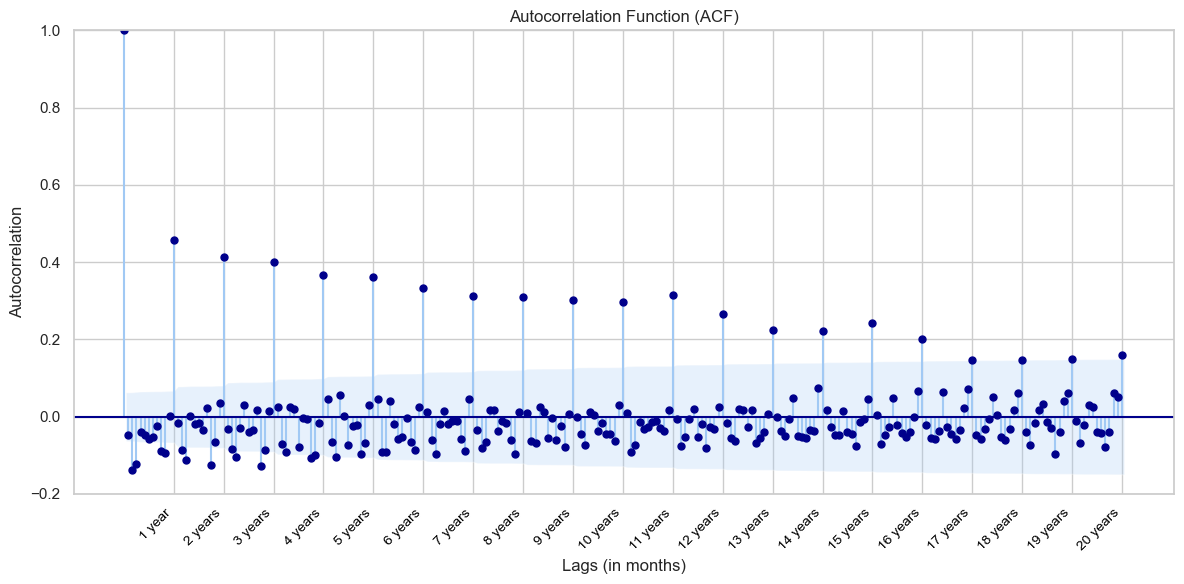

In [51]:
plot_acf_custom(df_year['Percentage'])

#### Analysis of the Autocorrelation plot:

1. **Initial Peak**: The first lag exhibits a peak close to 1, which is expected as it represents the correlation of the series with itself.

2. **Subsequent Lags**: Several spikes are observed that exceed the blue shaded area, indicating statistical significance. These prominent peaks suggest significant autocorrelation at those lags.

3. **Seasonal Patterns**: Notable peaks appear at regular intervals of 12 months (1 year) and persist beyond the confidence intervals up to a lag of 17 years. This implies two important findings: 

   - The significant spikes at lags corresponding to multiples of 12 months (1 year, 2 years, etc.) suggest a strong and consistent annual seasonality in the data.
   
   - The presence of these significant peaks at regular intervals, especially up to a lag of 17 years, indicates that the seasonal effect is not only strong but also has a long-term influence on the series. This suggests that past values, not just from the previous year but several years back, influence the current values.

Note: At the beginning of the plot, we observe a few points in the first year that are negatively correlated and fall outside the confidence intervals. For example, the second and third points exhibit negative correlations. This implies that when calculating the correlation between our time series and the same time series shifted by two or three months, the values tend to be negatively correlated. This indicates the presence of intrinsic differences between the months, and this pattern appears to persist throughout the year. Besides this effect, no other significant peaks are evident in the graph.

**Conclusion**: Therefore, we can assert two key findings: there is an annual seasonality in our data, as evidenced by the significant peaks occurring every 12 months in our autocorrelation plot. Furthermore, it seems that the seasonal effect has a long-term impact on the years, exhibiting significant correlations up to 17 years later.
Additionally, the fact that this autocorrelation is no longer significant after 17 years provides us with additional information: seasonality has evolved over time, aligning with the implications of the Canova-Hansen Test result.

#### *2.4 Decoding Trends and Seasonality: Seasonality Visualization*

Now that we know that seasonality has changed over time and that patterns tend to change approximately every 17 years, we will attempt to visualize these differences. To do so, we will extract two datasets from our data. The first dataset will contain the most recent 17 years [1993, 2009], and the second will encompass the preceding 17 years [1976, 1992]. Subsequently, we will conduct a Canova-Hansen test to ensure that among these datasets, the seasonal motif remains stable.

In [52]:
# Extracting the release years for recent year seasonality, which includes the 17 most recent years
recent_year_seasonnality = list(df_year['Release Year'].unique()[-17:])

# Extracting the release years for past year seasonality, encompassing the 17 years preceding the recent ones
past_year_seasonnality = list(df_year['Release Year'].unique()[-17*2:-17])

In [53]:
# Creating a DataFrame 'df_recent' containing data for recent year seasonality
df_recent = df_year[df_year['Release Year'].isin(recent_year_seasonnality)]

# Creating a DataFrame 'df_past' containing data for past year seasonality
df_past = df_year[df_year['Release Year'].isin(past_year_seasonnality)]

In [54]:
# Running the Canova-Hansen (CH) Test
ch_test = CHTest(m=12)  # Initialize the CH test with m=12 for monthly data.

# Estimate the seasonal differencing term for the DataFrame containing past year data
D_past = ch_test.estimate_seasonal_differencing_term(df_past['Percentage'].values)
print("The result of the Canova-Hansen Test for the DataFrame containing the past year is:", D_past)

# Estimate the seasonal differencing term for the DataFrame containing recent year data
D_recent = ch_test.estimate_seasonal_differencing_term(df_recent['Percentage'].values)
print("The result of the Canova-Hansen Test for the DataFrame containing the recent year is:", D_recent)

The result of the Canova-Hansen Test for the DataFrame containing the past year is: 0
The result of the Canova-Hansen Test for the DataFrame containing the recent year is: 0


Great! Now that we've ensured this pattern is stable, we'll attempt to extract the seasonality from our two different datasets. To do this, we'll use the highly useful function `seasonal_decompose` from `statsmodels`. This function allows us to decompose our time series into three components:

**Trend Component**:
- The trend shows the long-term progression of the data, smoothing out short-term fluctuations.
- It indicates whether there's a general upward or downward trajectory in movie releases over time or if the industry is experiencing periods of growth, decline, or stability.
- In a multiplicative model like the one we've chosen, the trend is scaled by the seasonal and residual components, suggesting that the impact of the trend may increase or decrease depending on the level of the time series.

**Seasonal Component**:
- The seasonal component captures regular patterns that occur within specific, fixed periods - in the case of monthly data, this might highlight yearly cycles.
- It reveals the times of the year when movie releases are consistently higher or lower.
- Since the model is multiplicative, the seasonality effect is proportional to the data. This means that if the trend is upward, the seasonal effect would amplify the peaks and troughs in the observed data.

**Residual Component**:
- Residuals represent the component of the data that cannot be explained by the trend or seasonal components. These are essentially the irregular or random fluctuations that remain after the trend and seasonal components have been accounted for.
- In a multiplicative model, the residuals are obtained by dividing the original series by the product of the trend and seasonal components.
- Large residuals can indicate anomalies or outliers in the data, such as an unexpected spike in movie releases due to a special event or a sudden drop due to external factors not captured by the model.

In [55]:
result_past, result_recent = plot_seasonal_decomposition(df_past, df_recent)

Without surprise, we observe that the overall trend increases for both the movies from [1976-1992] and those from [1993-2009]. We also notice that the seasonal patterns are different. Let's try to visualize them in more detail.

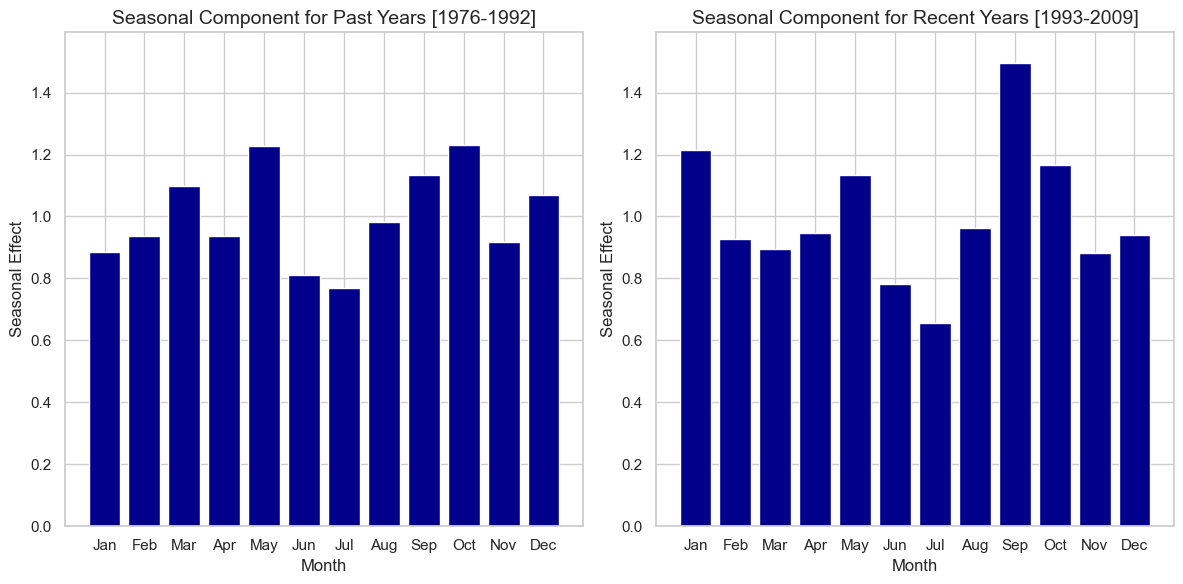

In [56]:
plot_seasonal_components(result_past, result_recent)

Indeed, we observe that the seasonal patterns have changed between these two periods. The more recent period seems to exhibit more pronounced differences among the months of the year compared to the previous period. For instance, in the most recent period, the month of July has a multiplicative factor relative to the trend of about 0.6, while in the past period, it was 0.8. On the other hand, the month of September is well above the general trend in the most recent period, at 1.6 times the trend, whereas in the past period, it was only 1.2.

In conclusion, it's fascinating to observe how seasonal patterns evolve over time. We notice significant differences. The most recent period in our dataset appears to exhibit more pronounced variations than before, suggesting that these month-to-month differences seem to intensify over time.

### **3. Detailed Study by Genre and Location** 

In this section, we will examine whether there are differences in seasonality between film genres and locations. To do this, we will work exclusively with data from the ten most recent years in our dataset. The selection of these last ten years is motivated by several factors:

1. Data Volume: The most recent years typically contain a larger number of films in our dataset, enabling a more robust and precise analysis of seasonal patterns, especially as we subdivide our dataset into subgroups.

2. Stability of Seasonal Patterns: As demonstrated by the previous analysis, seasonal patterns appear to be stable every 17 years, regardless of genre or location. By taking this stability into account, we aim to limit biases related to the overall trend, allowing us to delve deeper into the analysis by genre and continent.

In [57]:
df = df_release_info.copy()

# Creating a DataFrame 'df' containing data for recent year seasonality
df = df[df['Release Year'].isin(sorted(df['Release Year'].unique())[-10:])]

#### *3.1 Monthly Cinematic Release Dynamics: Histogram Analysis of Release Months depending on Genre and Location*

In this section, we explore the potential presence of seasonality in film releases, considering both genre and location, across time. To do so, we will perform a similar analysis to that in Section 2.1, while distinctly separating genres and locations.

In [58]:
# Group the DataFrame 'df' by multiple columns and count the occurrences
# Reset the index and rename the count column as 'Counts'
grouped = df.groupby(['Release Year', 'Release Month', 'Movie genres', 'Movie Continent']).size().reset_index(name='Counts')

# Group and sum counts again by 'Release Year', 'Movie genres', and 'Movie Continent'
year_count_genres_cont = grouped.groupby(['Release Year', 'Movie genres', 'Movie Continent']).sum().reset_index()

# Merge 'grouped' and 'year_count_genres_cont' DataFrames, using common keys
# Perform a left merge, add suffixes to distinguish columns, and drop the duplicate column
df_year = grouped.merge(year_count_genres_cont, on=['Release Year', 'Movie genres', 'Movie Continent'], how='left', suffixes=('', '_total')).drop('Release Month_total', axis=1)

# Calculate the 'Percentage' column by dividing 'Counts' by 'Counts_total' and multiplying by 100
df_year['Percentage'] = (df_year['Counts'] / df_year['Counts_total']) * 100

df_year.head()

,Release Year,Release Month,Movie genres,Movie Continent,Counts,Counts_total,Percentage
0,2000,1,Action,Asia,8,48,16.666667
1,2000,1,Action,Europe,3,35,8.571429
2,2000,1,Action,North America,5,90,5.555556
3,2000,1,Comedy,Asia,2,29,6.896552
4,2000,1,Comedy,Europe,10,111,9.009009


In [59]:
fig = plot_genre_month_percentage(df_year)
fig.show()


#### *3.2 Seasonal Stability Diagnostics: Canova-Hansen Testing by Category and Region*

In [60]:
# Initialize the Canova-Hansen test object
ch_test = CHTest(m=12)
calculate_canova_hansen_test(df_year, ch_test)

,Genre,Continent,D Value
0,Action,Asia,0
1,Action,Europe,0
2,Action,North America,0
3,Comedy,Asia,0
4,Comedy,Europe,0
5,Comedy,North America,0
6,Drama,Asia,0
7,Drama,Europe,0
8,Drama,North America,0
9,Romance Film,Asia,0


It appears that the seasonal patterns within genres and locations remain stable throughout the selected period [1993-2009]. It's worth noting that this period was initially chosen in section 2.3 because the seasonal patterns, encompassing all genres and locations, were stable during that time. This latest analysis simply demonstrates that when we subdivide our dataset by genre and location, any intrinsic patterns within these subdatasets also remain consistent over the same period.

#### *3.2 Seasonal Stability Diagnostics: Canova-Hansen Testing by Category and Region*

To further delve into this analysis, we will calculate autocorrelation, as done in section 2.3. However, this time, we will separate the film genres and continents.

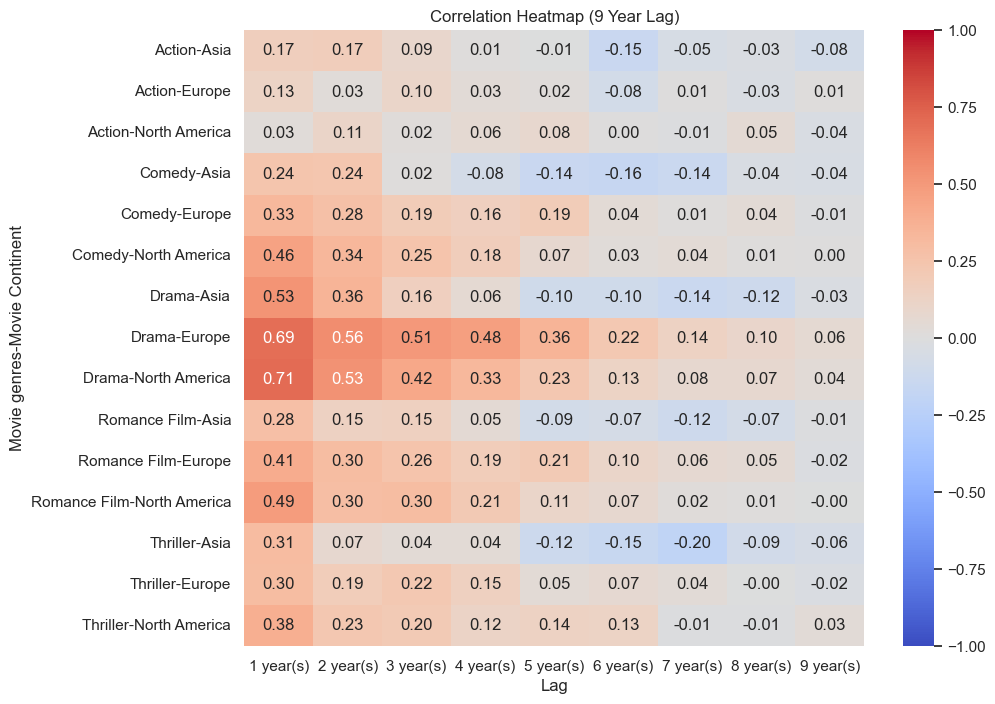

In [61]:
plot_correlation_heatmap(df_year, number_years=9)

The heatmap reveals some highly interesting findings. Firstly, it allows us to affirm that the presence or absence of an annual seasonal pattern varies depending on the cinematic genre and location. Let's take, for example, the cinematic genre "action" across all locations. We can observe that the autocorrelation is very low, or even non-existent, for North America, year after year (lag of 1 year). Consequently, we can conclude that it is unlikely for this cinematic genre to exhibit recurring patterns from year to year based on release months.

Conversely, certain cinematic genres show distinct patterns, with "drama" being a notable example. It demonstrates a very strong autocorrelation from one year to the next. This effect is particularly pronounced in Europe and North America, where the autocorrelation remains significant for up to 4 years. In such cases, we can confidently assert that this genre is highly likely to display an annual seasonal motif, and this pattern extends over several years.

On a broader scale, the continent with the least autocorrelation in this dataset is Asia. Europe and North America seem to follow similar patterns based on their respective genres.

Furthermore, when examining each genre individually, we uncover disparities between them. Some genres exhibit pronounced annual seasonal patterns, while others do not display such patterns at all.

#### *3.3 : Decoding Trends and Seasonality : by Genre Category and Region*

Similarly to the analysis conducted in point 2, we now focus on examining the seasonal multiplicative factors. The objective here is to highlight, for genres and locations exhibiting seasonal patterns as identified in point 3.2, the months that stand out from the general trend and contribute to the formation of these patterns.

In [62]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_results = perform_seasonal_decomposition(df_year)

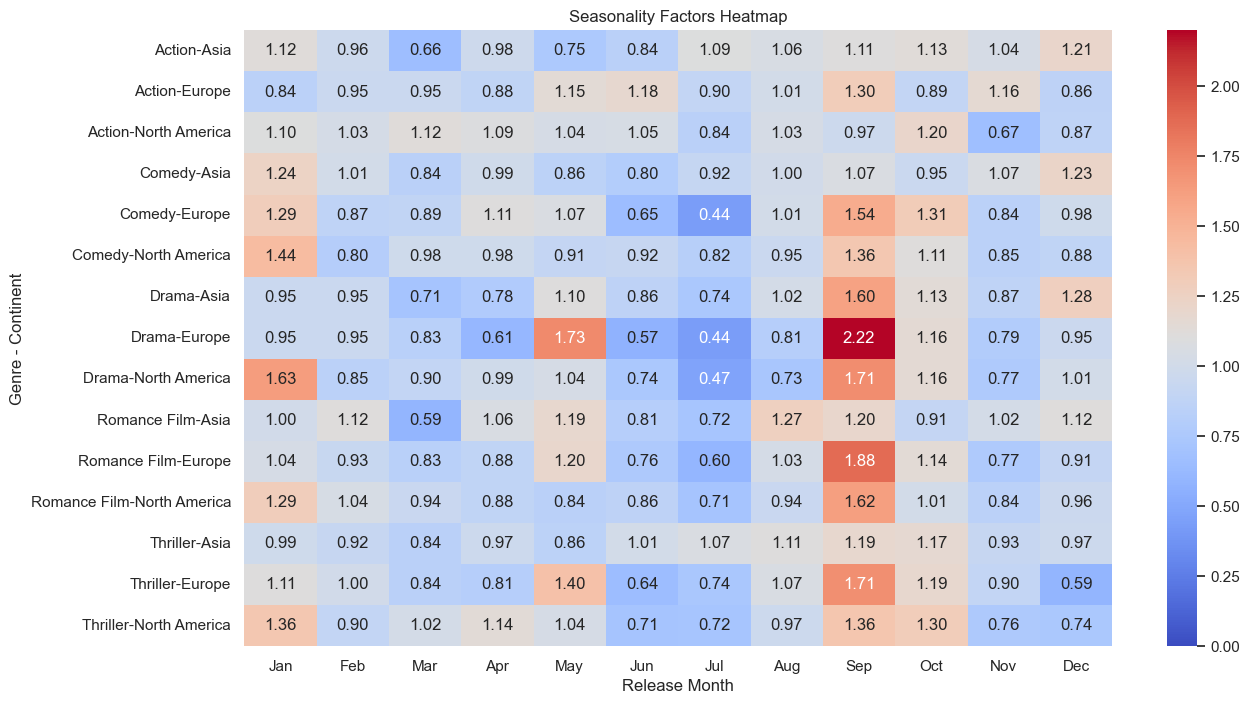

In [63]:
plot_seasonality_heatmap(decomposition_results)

It is interesting to delve into the case of the drama film genre. According to our analysis in section 3.2, this genre exhibited annual seasonality for all continents combined. However, this latest analysis reveals intriguing differences within its seasonal patterns.

Specifically, when examining the multiplicative factors of the drama genre in Europe and North America, we observe notable distinctions. In Europe, the month of May appears to be significant, with a multiplicative factor of 1.73 compared to the general trend, indicating that a substantial number of drama films are released in May. In contrast, in North America, May does not significantly impact the trend, as evidenced by a factor of 1.04. Conversely, January exhibits an inverse behavior, with North America having a factor of 1.63, while Europe's factor is 0.95.

It's important to note that both regions share high values for June and July and lower values for September.

While we may not be able to discern every single difference between genres, locations, and release months individually, a quick glance at the heatmap confirms our initial hypothesis. Annual seasonal patterns indeed exist for certain genres and locations, and when they do, these patterns exhibit variations among them.

## **Research Question 2**
---
**Analysis on Pursuing Oscar's**


## **Research Question 3**
---
